In [1]:
# https://youtu.be/PaCmpygFfXo?list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&t=3777

In [2]:
import pandas as pd
import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline


## Neural Network Bigram model
Train the network to predict probability of the second character of the bigrams

In [3]:
words = open('names.txt', 'r').read().splitlines()

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i + 1 for i,s in enumerate(chars)} # +1 to make special character at 0
#stoi['<S>'] = 26
#stoi['<E>'] = 27
# single special token, place at index 0
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [5]:
# create the training set of bigrams

# 2 lists; inputs and the outputs (second character of bigram)
xs, ys = [], []


for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] 
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
        
# lower case assumes the dtype; upper case coerces to float32
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [6]:
xs.dtype

torch.int64

In [7]:
ys

tensor([ 5, 13, 13,  1,  0])

In [8]:
# at this stage the xs and ys values are the indices of the characters
# convert to one-hot encoding in order have meaningful value for use in the weights of the nn
import torch.nn.functional as F

# encode the full 27 characters as the number of classes
xenc = F.one_hot(xs, num_classes=27).float() # cast as float for later forward-backward pass
xenc.shape

torch.Size([5, 27])

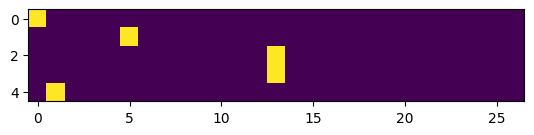

In [9]:
plt.imshow(xenc)

# e m m a in one hot encoding

In [10]:
xenc.dtype

torch.float32

In [11]:
# first neuron

# inital weights
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator = g, requires_grad = True) # 27 character values, 27 neurons (evaluations)
                                         # need to explicitly require gradient in the calculation
# W

In [12]:
# (5, 27) @ (27, 1) --> (5, 1)
# (5, 27) @ (27, 27) --> (5, 27)

xenc@W

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9643e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2843e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4039e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0730e-02,
          2.4968e+00,  2.4448e+00],
        [ 4.7236e-01,  1.4830e+00,  3.1748e-01,  1.0588e+00,  2.3982e+00,
          4.6827e-01, -6.5650e-01,  6.1662e-01, -6.2197e-01,  5.1007e-01,
          1.3563e+00,  2.3445e-01, -4.5585e-01, -1.3132e-03, -5.1161e-01,
          5.5570e-01,  4.7458e-01, -1.3867e+00,  1.6229e+00,  1.7197e-01,
          9.8846e-01,  5.0657e-01,  1.0198e+00, -1.9062e+00, -4.2753e-01,
         -2.1259e+00,  9.6041e-01],
        [ 1.9359e-01,  1.0532e+00,  6.3393e-01,  2.5786e-01,  9.6408e-01,
         -2.4855e-01,  2.4756e-02, -3.0404e-02,  1.5622e+00, -4.4852e-01,
         -1.2345e+00,  1.1220e+00, -6.73

In [13]:
(xenc@W)[3, 13] #firing rate of the 13th neuron on the 4th input; dot product of the input 3 and the 13th column

tensor(0.0379, grad_fn=<SelectBackward0>)

In [14]:
(xenc[3] * W[:, 13]).sum() # actual equation for dot product

tensor(0.0379, grad_fn=<SumBackward0>)

In [15]:
# interpret the outputs of the neural net as the log counts of the layers; positive and negative values
# in order to create probabilities take the exponitiation of the log counts

(xenc@W).exp()

tensor([[ 4.7940,  0.7888,  0.9730,  0.3326,  1.3309,  0.9708,  0.2129,  1.8311,
          1.0824,  2.4710,  0.6242,  2.1964,  0.7200,  0.6486,  3.9469, 18.7908,
          4.7673,  0.1967,  1.9683,  0.4315,  2.6775,  0.8621,  0.2277,  1.5656,
          0.9317, 12.1434, 11.5281],
        [ 1.6038,  4.4060,  1.3737,  2.8830, 11.0032,  1.5972,  0.5187,  1.8527,
          0.5369,  1.6654,  3.8818,  1.2642,  0.6339,  0.9987,  0.5995,  1.7432,
          1.6073,  0.2499,  5.0680,  1.1876,  2.6871,  1.6596,  2.7728,  0.1486,
          0.6521,  0.1193,  2.6128],
        [ 1.2136,  2.8669,  1.8850,  1.2942,  2.6224,  0.7799,  1.0251,  0.9701,
          4.7691,  0.6386,  0.2910,  3.0710,  0.5098,  1.0386,  0.5719,  0.4373,
          2.2763,  0.4719,  2.5289,  0.2265,  0.8082,  0.3054,  0.5164,  0.7918,
          4.6866,  1.8232,  0.4921],
        [ 1.2136,  2.8669,  1.8850,  1.2942,  2.6224,  0.7799,  1.0251,  0.9701,
          4.7691,  0.6386,  0.2910,  3.0710,  0.5098,  1.0386,  0.5719,  0.4373

### Foward Pass:

In [16]:
# prediction of the following character (column) from a given character (row)

logits = xenc @ W # log counts

# softmax function: https://en.wikipedia.org/wiki/Softmax_function
counts = logits.exp() # equivalent to the N count matrix
probs = counts / counts.sum(1, keepdims = True)
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [17]:
probs.shape # shape for the given input (emma, with start and end token '.')

torch.Size([5, 27])

### Summary:
- input dataset; inputs and labels
- each input receives 27 different weights; the likelihood of the next character being what is represented by that column; start with random values
- values are exonentiated and divided by the sum of the rows (softmax reduction to probabilities)
- probabilities represent probability for each character from the columns following the characters from the rows
- all of the steps are differentiable --> backpropagation to adjust the weights

In [18]:
# for the first word example

nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('---------------')
    print(f"bigram example: {i + 1}: {itos[x]}{itos[y]} (indexes {x}, {y})")
    print('input to the neural net: ', x)
    print('output probabilities from the neural net: ', probs[i])
    print('label (actual next character): ', y)
    p = probs[i, y]
    print('probability assigned by the net to the correct character: ', p.item())
    logp = torch.log(p)
    print('log likelihood: ', logp.item())
    nll = -logp
    print('negative log likelihood: ', nll.item())
    nlls[i] = nll
    
print('================')
print('average negative log likelihood, i.e. loss = ', nlls.mean().item())

---------------
bigram example: 1: .e (indexes 0, 5)
input to the neural net:  0
output probabilities from the neural net:  tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)
label (actual next character):  5
probability assigned by the net to the correct character:  0.01228625513613224
log likelihood:  -4.399273872375488
negative log likelihood:  4.399273872375488
---------------
bigram example: 2: em (indexes 5, 13)
input to the neural net:  5
output probabilities from the neural net:  tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
       grad_fn=<SelectBackward0>)
label (a

In [19]:
# minimize the loss by tuning the W settings using the gradients

In [20]:
probs.shape

torch.Size([5, 27])

In [21]:
# the probabilites predicted for the indexes of emma
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

In [22]:
# probabilites that the neural network assigns to the correct next character
probs[torch.arange(5), ys]

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150], grad_fn=<IndexBackward0>)

In [23]:
# vectorized calculation of loss
loss = - probs[torch.arange(5), ys].log().mean()

In [24]:
loss

tensor(3.7693, grad_fn=<NegBackward0>)

### Backward pass

In [25]:
# set gradients to 0
W.grad = None
loss.backward()  # network remembers the operations in the network; 1 weighted layer and 1 activation layer (softmax)

In [26]:
# W.grad # influence of the given weights on the loss function 

In [27]:
# single layer nn, no need to loop

# new weights += learning rate * gradient
W.data += -0.1 * W.grad

In [28]:
loss.item()

3.7693049907684326

In [29]:
# create the dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

number of examples:  228146


In [30]:
# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator = g, requires_grad = True)
#if you attempt to make the values close to 0 there will be less variability within the probability distribution


In [33]:
# gradient descent
for k in range(100):

    # forward pass
    xenc = F.one_hot(xs, num_classes = 27).float() # input to the network
    logits = xenc @ W # predict log-counts <-- this is the step that will be elaborated on with later models 
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims = True) # probabilities for next character
#     loss = -probs[torch.arange(num), ys].log().mean()

    # loss with regularization: the second sum term drives the values towards 0, reducing variability and 
    #    minimizing the impact of the changes
    # the first sum term drives the values to approach the predicted value -- minimize loss
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() 
    print(loss.item())

    # backward pass
    W.grad = None # set zero gradient
    loss.backward()

    # update 
    W.data += -50 * W.grad  # arrives at the same loss as the counting technique

2.4829697608947754
2.4829440116882324
2.4829187393188477
2.482893943786621
2.4828693866729736
2.4828450679779053
2.482820987701416
2.482797384262085
2.482774257659912
2.4827513694763184
2.4827287197113037
2.482706308364868
2.482684373855591
2.4826626777648926
2.4826412200927734
2.4826200008392334
2.4825992584228516
2.4825785160064697
2.482558250427246
2.4825379848480225
2.482518196105957
2.4824984073638916
2.4824793338775635
2.4824600219726562
2.4824414253234863
2.4824228286743164
2.4824044704437256
2.482386589050293
2.482368230819702
2.4823505878448486
2.482333183288574
2.4823157787323
2.4822990894317627
2.4822821617126465
2.4822652339935303
2.4822492599487305
2.4822328090667725
2.4822170734405518
2.482201099395752
2.4821853637695312
2.4821698665618896
2.482154607772827
2.4821391105651855
2.4821243286132812
2.482109785079956
2.482095241546631
2.4820809364318848
2.4820663928985596
2.4820523262023926
2.482038736343384
2.482024908065796
2.482011556625366
2.4819979667663574
2.481984615325

In [34]:
# sampling from a neural network to generate probable words

g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    
    out = []
    # start with the start token
    ix = 0
    while True:
        # proceed through the rows driven by the probability of the preceeding character
        # using the probabilities from a single tensor array will produce the same results
        # from the probabilistic model
        # p = P[ix]
    
    
        # with the neural network
        xenc = F.one_hot(torch.tensor([ix]), num_classes = 27).float()
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims = True) # probabilities for next character
    
    
        # select a new row based on the proability distribution of second characters of the current row
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix]) 
        if ix == 0: # if the selected next character is the end token break
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchthizarie.


In [35]:
# exact same results, same underlying model produced with probabilities and neural network 